# DBSCAN with make_moons Dataset

## Lib imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn import cluster, datasets

## Create and store new data as Pandas Dataframe

In [3]:
samples=500

X, y =datasets.make_moons(n_samples=samples, noise=0.1)

# Where X is our data, divided into 2 columns. Where y its an additional data array which the label is stored [0,1].

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# Data transformation into Pandas Dataframe, define also an third column where the labels are stored.

## Data Visualization

<IPython.core.display.Javascript object>


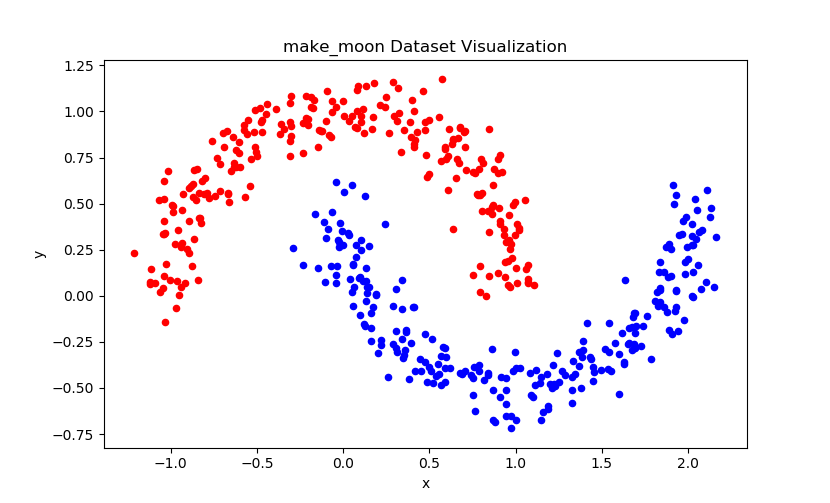

In [4]:
colors = {0:'red', 1:'blue'}

# Dictionary creation which will help us visualize the 2 groups. Red for label "0", Blue for label "1".

fig, ax = plt.subplots()
grouped = df.groupby('label')

# Group the data based on their group [0,1].

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', color=colors[key])
    plt.title("make_moon Dataset Visualization")

# Visualize data using the dictionary as color.

## Third column is not necessary to implement the DBSCAN algo

In [5]:
df2 = (df.drop(['label'], axis=1))

# Delete the third column and store the remaining data to a new var called: "df2".

model = DBSCAN(eps=0.17, min_samples=15).fit(df2)

# DBSCAN fit on the data from above "df2".

In [6]:
label = model.labels_

# Store the array which contains the output from DBSCAN.
# Label contains the iformation about which group the model separated the data points.
# Since we know the make_moons contain only 2 groups, we will see only [0,1] and -1 will be assign as an anomaly data point.

print(label)

[ 0  1  1  1  0  0  1  1  1  0  1  1  0  0  0  1  1  1  1  0  1  1  1  1
  0  0  0  0  1  0  1  1  0  0  1  0  0  0  0  0  1  1  1  0  0  1  1  0
  0  0  0  0  0  0  1  1  1  1  1  0  0  1  1  1  0 -1  1  1  0  1  1  1
  0  0  0  1  1  1  0  1  1  1  0  1  0  0  0  0  1  0  1  1  0  0  0  0
  0  1  1  1  0  0  0  1  0  0 -1  0  1  0  1  1  0  0  0  1  1  0  1  1
  0  0  1  0  0  0  1  1  1  1  1  1  1  0  0  0  1  0  0  1  0  0  0  0
  1  0  1  1  1  1  0  0 -1  0  0  0  0  0  0  0 -1  0  0  1  0  1  0  1
  1  0  1  1  1  0  1  0  1  1  0  1  1  0  0  0  1  0 -1  0  1  1  1  1
  1  1  0  0  1  1  0  0  0  0  1  1  1  0  1  0  0  0  1  0  1  1  1  0
  0  1  0  0  0  1  0  0  1  0  1  0  0  0  1  0  1  0  0  1  0  1  0  0
  0  1  1  1  0  0  1  1  1  0  0  0  1  1  0  0  0  1  0  1  0  0  0 -1
  0  1  1  1 -1  1  1  1  1  0  1  0  1  1  0  0  0  0  0  1  0  0  0  1
  0  1  1  1  1  1  0  1  0  0  1  0  0  0  0  1  0  1  1  0  1  1  0  0
 -1  1  0  0  1  1  0  1  0  1  0  0  0  1  1  0  1

## Frequency count of the normal data points and the anomaly points

In [7]:
unique, count = np.unique([label], return_counts=True)
outliers_groups_info = np.asarray((unique, count))

In [8]:
print(outliers_groups_info)

[[ -1   0   1]
 [ 11 247 242]]


## Visualization of the new data according to their group [0,1,-1] using their labels for color

<IPython.core.display.Javascript object>


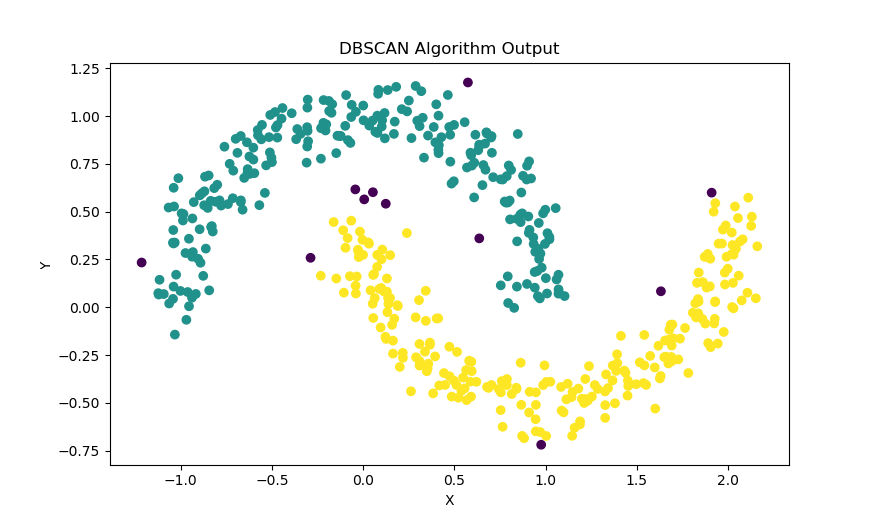

In [10]:
plt.scatter(df2.x , df2.y , c=label)
plt.xlabel("Χ")
plt.ylabel("Υ")
plt.title("DBSCAN Algorithm Output");

# For the anomaly points black/purple color has been given.

## Store the new label column from the DBSCAN into a new column

In [11]:
print(df2.head())
print(df2.info())

          x         y
0  0.843801  0.344454
1  1.253232 -0.467189
2  0.580611 -0.280110
3  0.105290  0.301315
4  0.797731  0.741202
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
x    500 non-null float64
y    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB
None


In [12]:
df2['groups'] = label
print(df2.head())
print(df2.info())

          x         y  groups
0  0.843801  0.344454       0
1  1.253232 -0.467189       1
2  0.580611 -0.280110       1
3  0.105290  0.301315       1
4  0.797731  0.741202       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
x         500 non-null float64
y         500 non-null float64
groups    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
None


## Keep only the normal data points

In [13]:
clean_data = df2.loc[df2['groups'] != -1]
print(clean_data.head())
print(clean_data.info())

          x         y  groups
0  0.843801  0.344454       0
1  1.253232 -0.467189       1
2  0.580611 -0.280110       1
3  0.105290  0.301315       1
4  0.797731  0.741202       0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 499
Data columns (total 3 columns):
x         489 non-null float64
y         489 non-null float64
groups    489 non-null int64
dtypes: float64(2), int64(1)
memory usage: 15.3 KB
None


## Visualize the new clean dataset

<IPython.core.display.Javascript object>


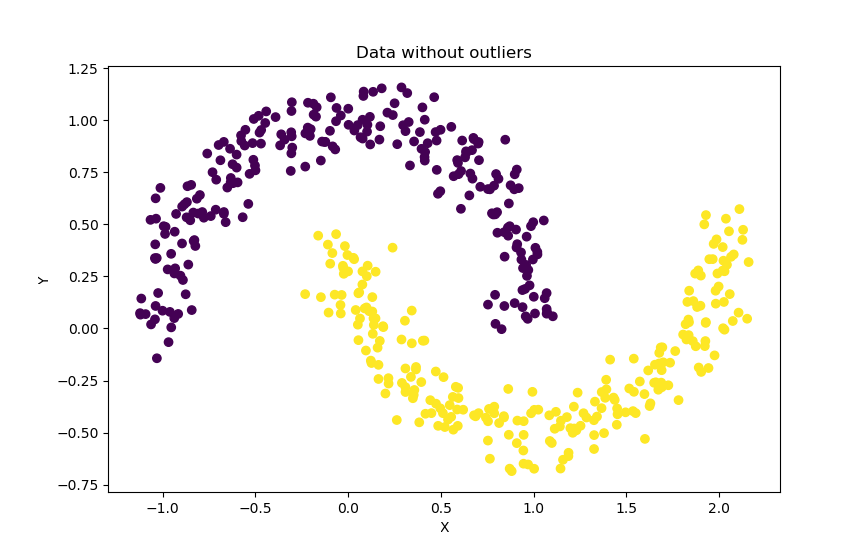

In [16]:
plt.scatter(clean_data.x , clean_data.y , c=clean_data.groups)
plt.xlabel("Χ")
plt.ylabel("Υ")
plt.title("Data without outliers");

## Percentage drop from the original dataset

In [17]:
n_samples = 500

# For 500 data points

num_outliers = outliers_groups_info[1][0]

# Store the numbers of anomaly data points found by the DBSCAN algo.

val_left = n_samples - num_outliers

# Get the number of the normal data points.

pct_drop = ((val_left-n_samples)/n_samples)*100

# Calculate the percentage drop.

In [18]:
print("Percentage drop: ",round(pct_drop),"% ")

Percentage drop:  -2.0 % 
